# Haar Wavelet


In [74]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math

In [4]:
image = cv2.imread('/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg', cv2.IMREAD_GRAYSCALE)

/tmp/ipykernel_361/1402693144.py:8: RuntimeWarning: overflow encountered in scalar add
  average = (matrix[i, j] + matrix[i, j+1] + matrix[i+1, j] + matrix[i+1, j+1]) / 4


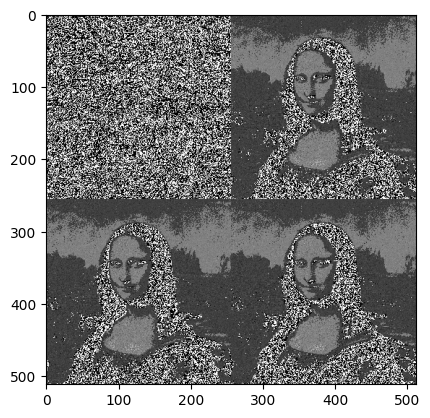

In [6]:
def haar_wavelet_transform(matrix):
    n = matrix.shape[0]
    transformed_matrix = np.copy(matrix)

    while n >= 2:
        for i in range(0, n, 2):
            for j in range(0, n, 2):
                average = (matrix[i, j] + matrix[i, j+1] + matrix[i+1, j] + matrix[i+1, j+1]) / 4
                transformed_matrix[i//2, j//2] = average

                diff1 = matrix[i, j] - average
                diff2 = matrix[i, j+1] - average
                diff3 = matrix[i+1, j] - average
                diff4 = matrix[i+1, j+1] - average

                transformed_matrix[i//2 + n//2, j//2] = diff1
                transformed_matrix[i//2, j//2 + n//2] = diff2
                transformed_matrix[i//2 + n//2, j//2 + n//2] = diff3
                transformed_matrix[i//2 + n//2, j//2 + n//2] = diff4

        matrix = np.copy(transformed_matrix)
        n //= 2

    return transformed_matrix

# Ejemplo de matriz 4x4
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])

transformed_matrix = haar_wavelet_transform(image)
plt.imshow(transformed_matrix, cmap="gray")
plt.show()
# print(transformed_matrix)



In [75]:
root2 = math.sqrt(2)

/tmp/ipykernel_361/3745503379.py:13: RuntimeWarning: overflow encountered in scalar subtract
  dif = (matrix[i, j] - matrix[i, j+1]) / root2
/tmp/ipykernel_361/3745503379.py:12: RuntimeWarning: overflow encountered in scalar add
  sum = (matrix[i, j] + matrix[i, j+1]) / root2


[[159.80613255 162.63455967 141.42135624 ...   4.24264069   4.94974747
    7.77817459]
 [165.4629868  172.53405461 166.17009358 ...   2.82842712  12.72792206
  178.89801564]
 [180.3122292  166.87720036 156.97770542 ...   4.24264069   4.94974747
   18.38477631]
 ...
 [101.11626971  90.50966799  77.07463915 ...   0.70710678 173.24116139
    1.41421356]
 [ 84.14570696  79.19595949  88.38834765 ... 179.60512242 178.19090886
  164.75588002]
 [ 85.55992052  79.19595949 100.40916293 ... 177.48380208 156.27059864
  170.41273427]]


[[230.         237.         217.5        ...   4.24264069   4.94974747
    7.77817459]
 [246.5        233.5        223.         ...   2.82842712  12.72792206
  178.89801564]
 [241.5        221.         217.5        ...   4.24264069   4.94974747
   18.38477631]
 ...
 [-19.5          4.5          3.5        ...   0.70710678 173.24116139
    1.41421356]
 [ -6.          -9.5         18.         ... 179.60512242 178.19090886
  164.75588002]
 [ -1.           0.          -

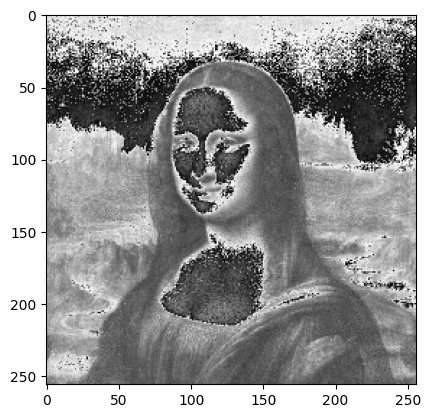

In [77]:
def haar_wavelet_transform(matrix):
    n = int(matrix.shape[0])
    n_half = int(n /2)
    transformed_matrix = np.zeros((n,n))

    if(n >= 2):
        for i in range(0, n):
            aux = 0
            aux2 = int(n_half + aux)
            for j in range(0, n, 2):

                sum = (matrix[i, j] + matrix[i, j+1]) / root2
                dif = (matrix[i, j] - matrix[i, j+1]) / root2
                transformed_matrix[i,aux] = sum
                transformed_matrix[i,aux2] = dif
                aux = aux + 1
                aux2 = aux2 + 1
        print(transformed_matrix)
        print("\n")
        transformed_matrix2 = np.copy(transformed_matrix)
        for j in range(0, n_half):
            aux = 0
            aux2 = int(n_half + aux)
            for i in range(0, n, 2):

                sum = (transformed_matrix[i, j] + transformed_matrix[i+1, j]) / root2
                dif = (transformed_matrix[i, j] - transformed_matrix[i+1, j]) / root2

                transformed_matrix2[aux,j] = sum
                transformed_matrix2[aux2,j] = dif
                aux = aux + 1
                aux2 = aux2 + 1

    print(transformed_matrix2)
    # Obtener la matriz n/2 x n/2 correspondiente a la esquina superior izquierda
    new_matrix = transformed_matrix2[:n_half, :n_half]


    return new_matrix

# Ejemplo de matriz 4x4
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])

transformed_matrix = haar_wavelet_transform(image)
print("\n")
# print(transformed_matrix)
plt.imshow(transformed_matrix, cmap="gray")
plt.show()



In [61]:
for i in range(0,4,2):
    print(i)

0
2
